<a href="https://colab.research.google.com/github/Jpgutierrez777/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [27]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Lectura de archivo json
datos = pd.read_json('https://raw.githubusercontent.com/Jpgutierrez777/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [29]:
columns = list (datos.columns)
columns

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

In [38]:
#Normalizado columnas diccionario
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

df_normalizado = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']), customer_df, phone_df, internet_df, account_df], axis=1)
display(df_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [37]:
columns1 = list (df_normalizado)
columns1

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [39]:
#Informaación de las columnas
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [42]:
#Validación que no exista datos nulos
df_normalizado.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [44]:
#Verificación de que no existan datos duplicados
df_normalizado.duplicated().sum()

np.int64(0)

In [49]:
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

#📊 Carga y análisis

**Análisis Descriptivo**

In [51]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


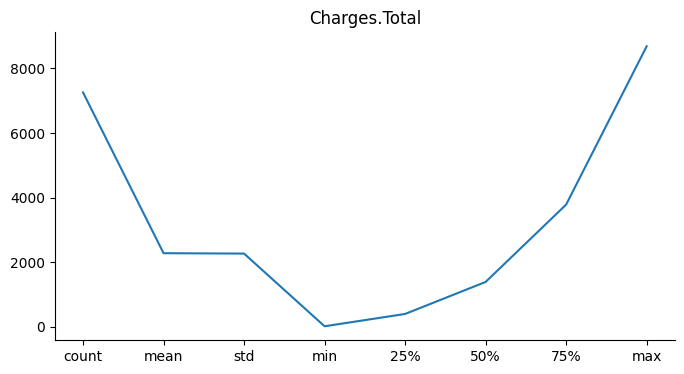

In [52]:
from matplotlib import pyplot as plt
_df_10['Charges.Total'].plot(kind='line', figsize=(8, 4), title='Charges.Total')
plt.gca().spines[['top', 'right']].set_visible(False)

Distribución de evasión

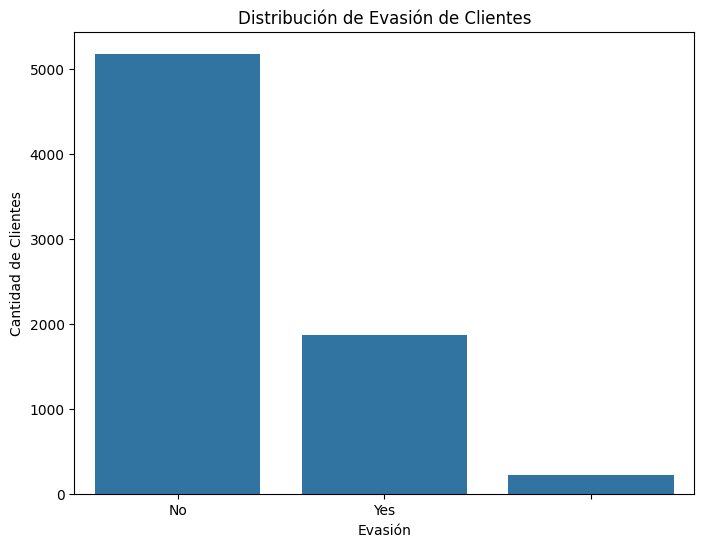

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_normalizado)
plt.title('Distribución de evasión de clientes')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Clientes')
plt.show()

**Recuento de evasión por variables categóricas**

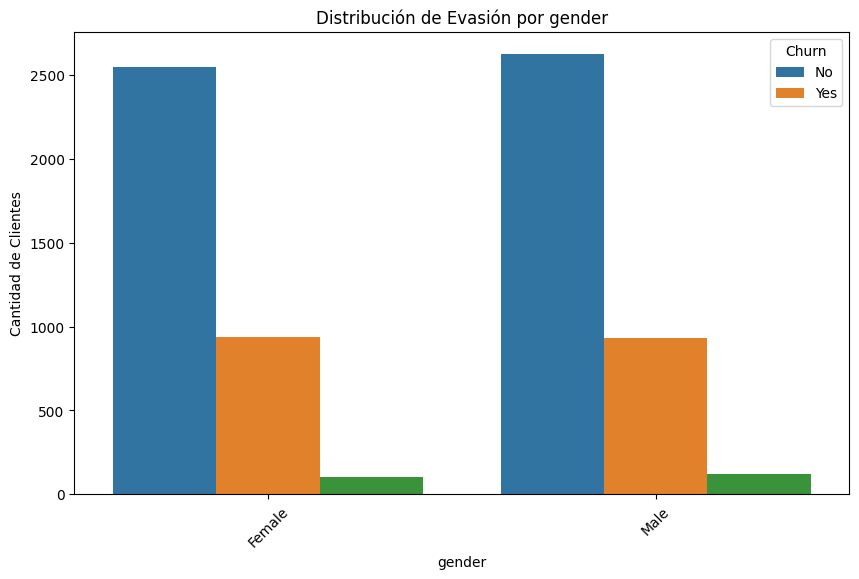

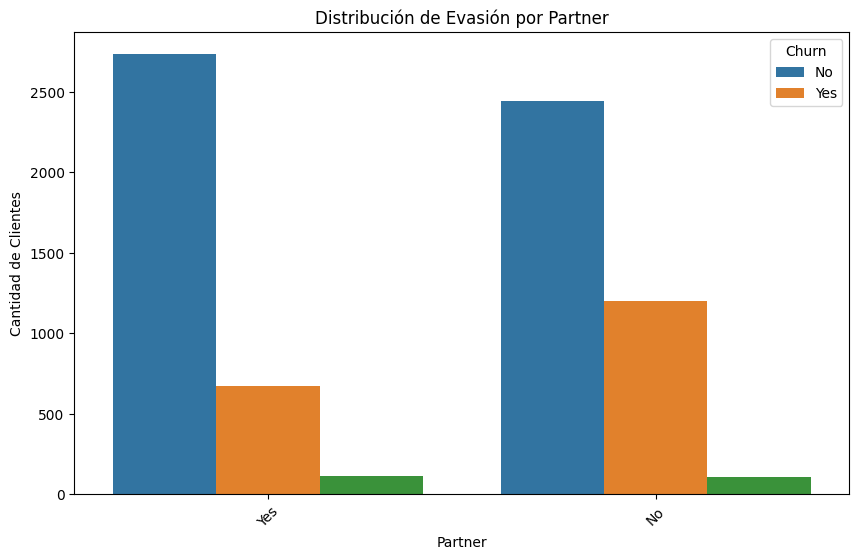

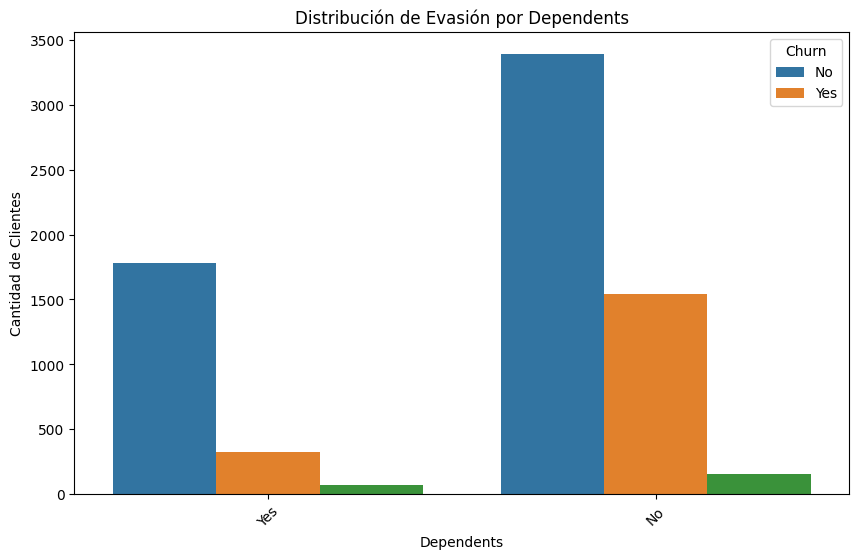

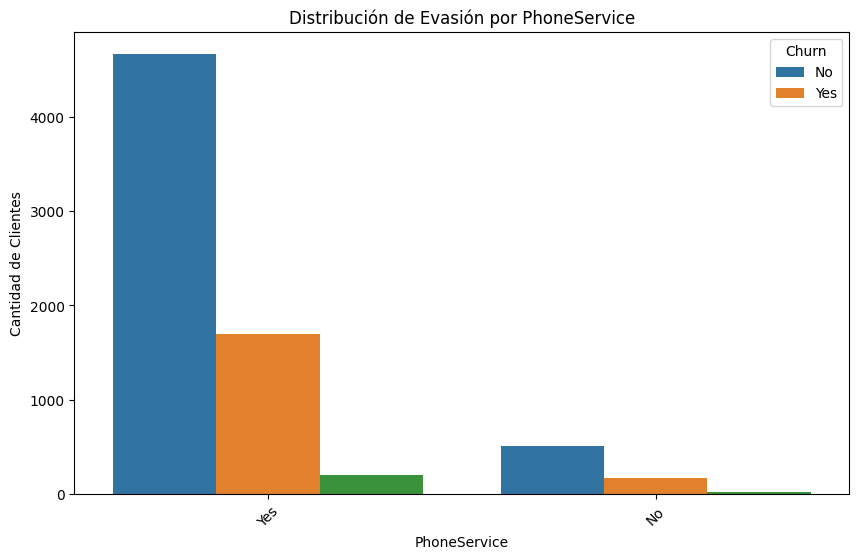

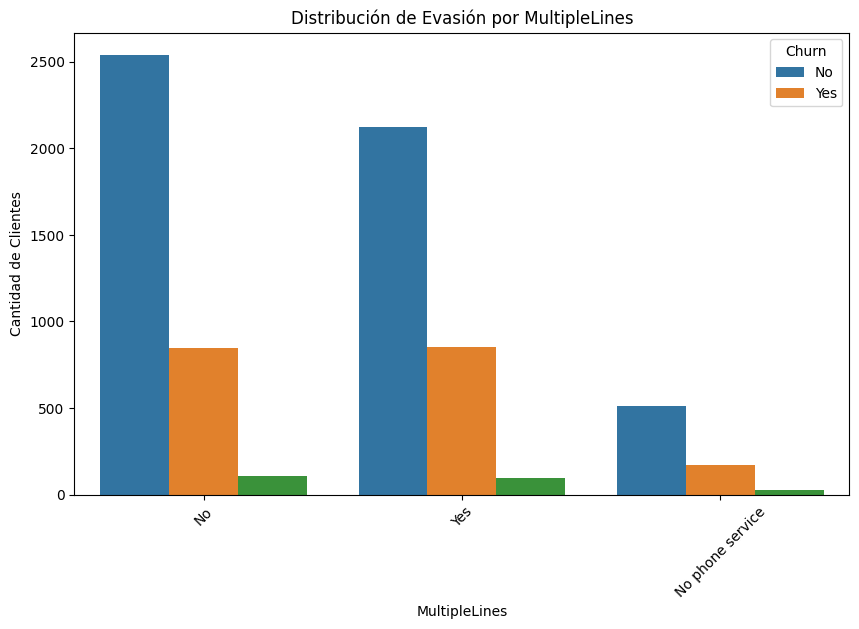

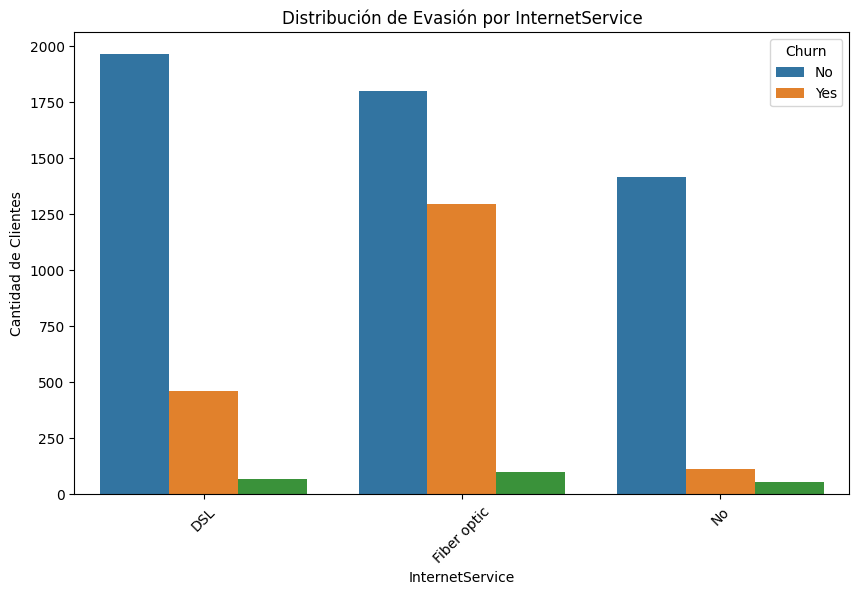

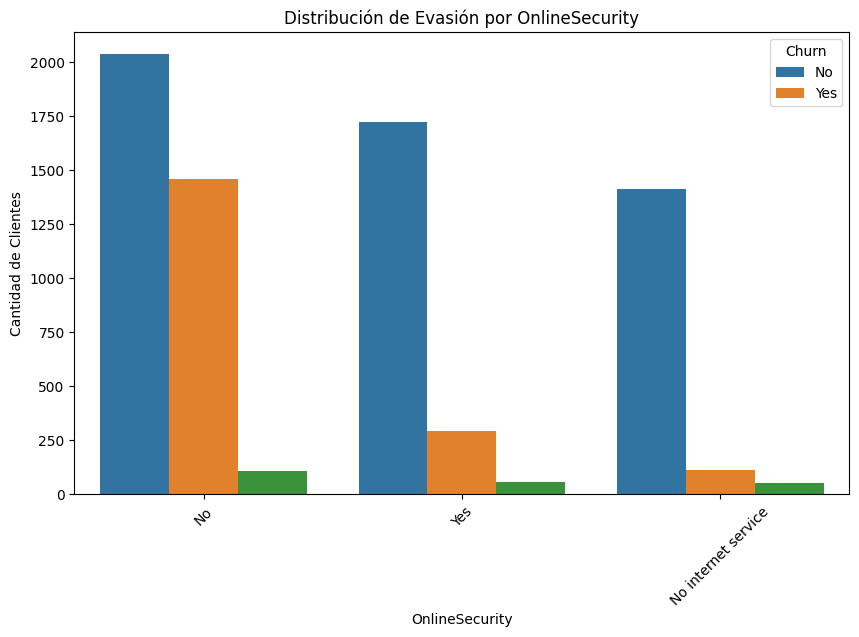

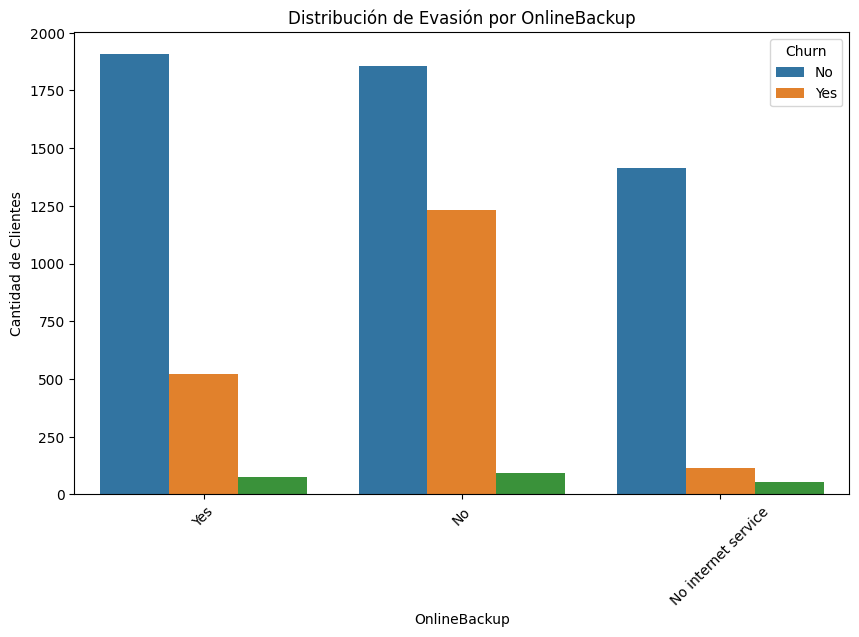

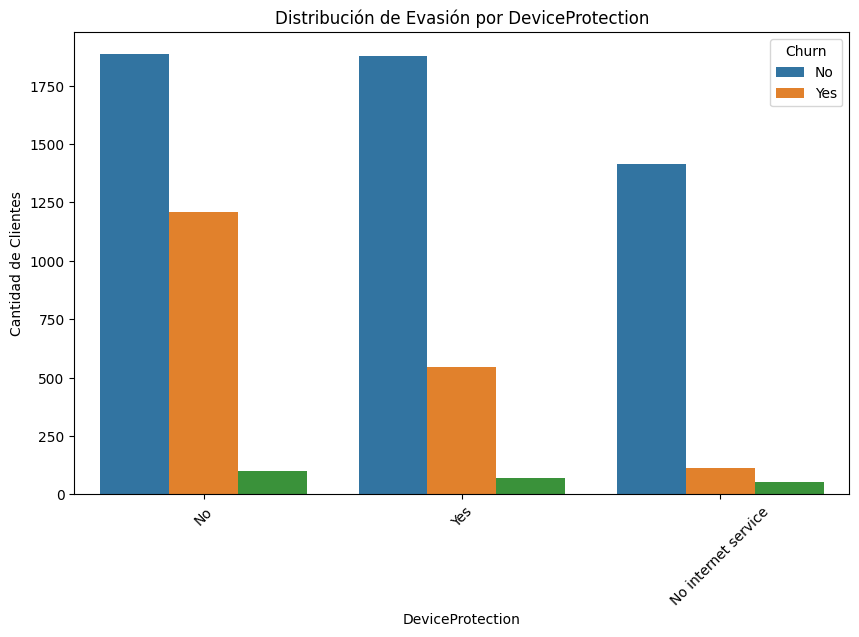

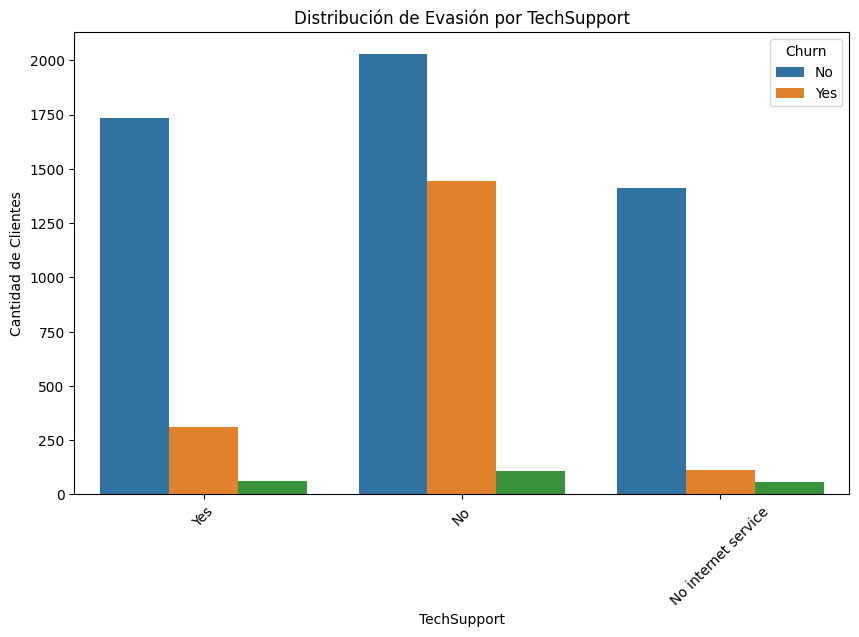

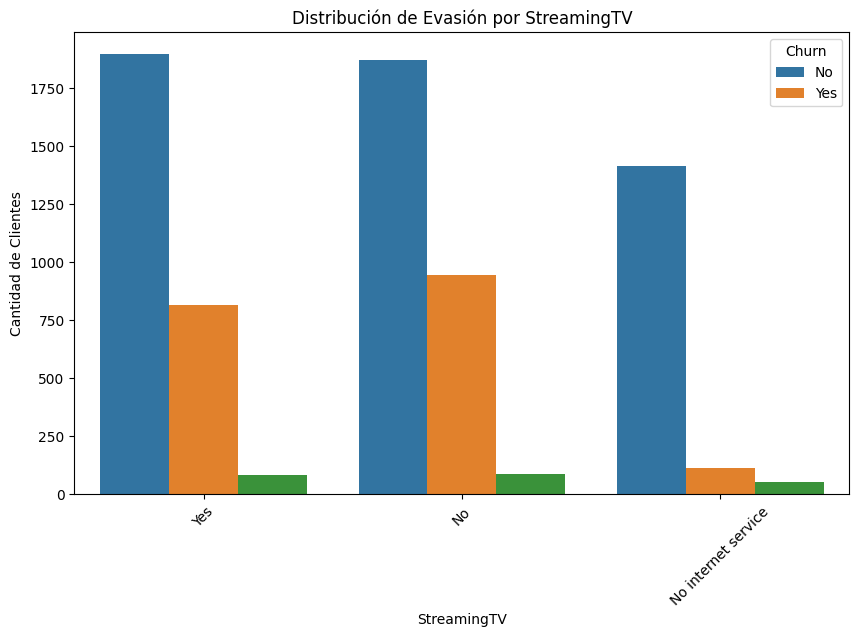

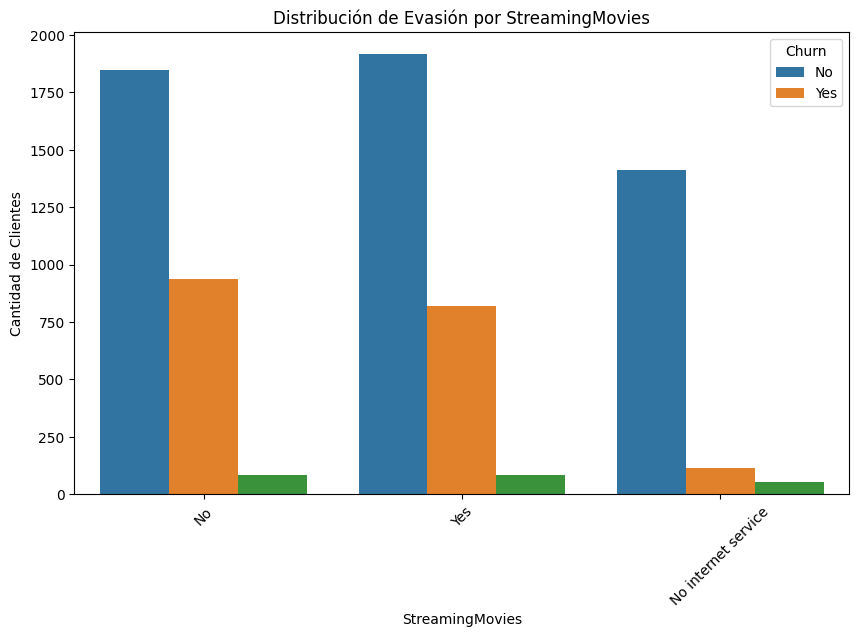

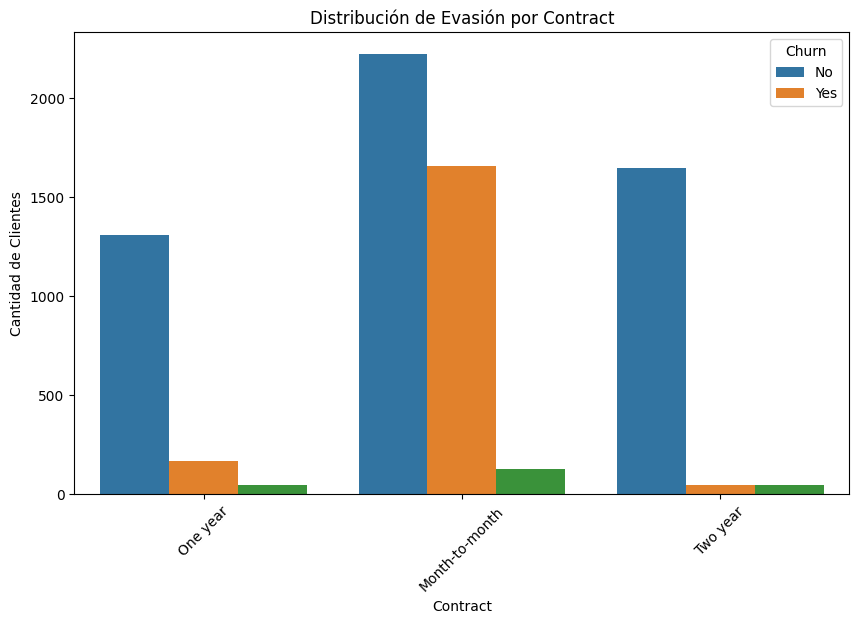

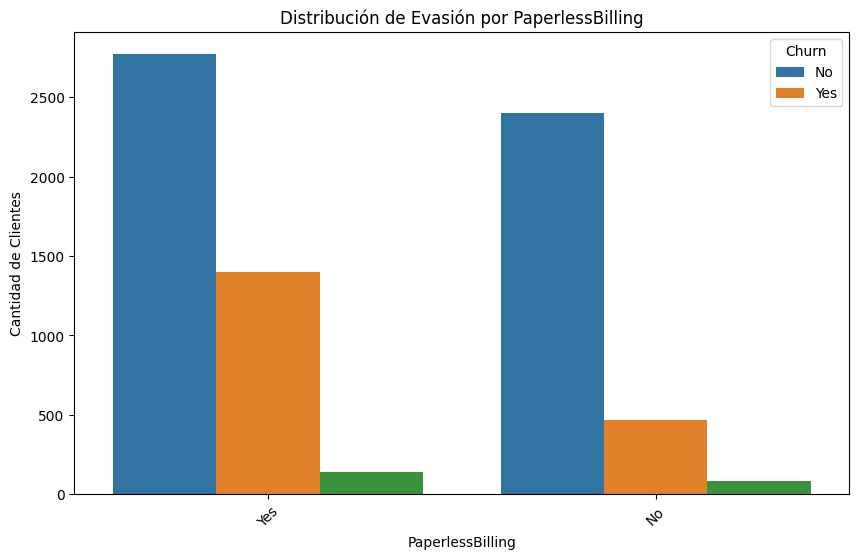

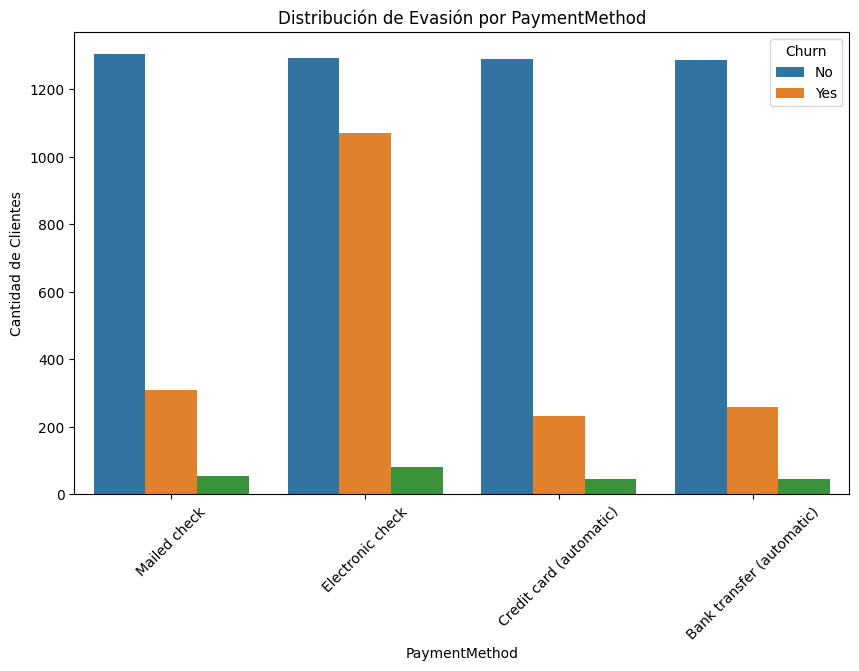

In [56]:
categorical_cols = df_normalizado.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col not in ['customerID', 'Churn']:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Churn', data=df_normalizado)
        plt.title(f'Distribución de Evasión por {col}')
        plt.xlabel(col)
        plt.ylabel('Cantidad de Clientes')
        plt.xticks(rotation=45)
        plt.show()

Conteo de evasión por variables **numéricas**

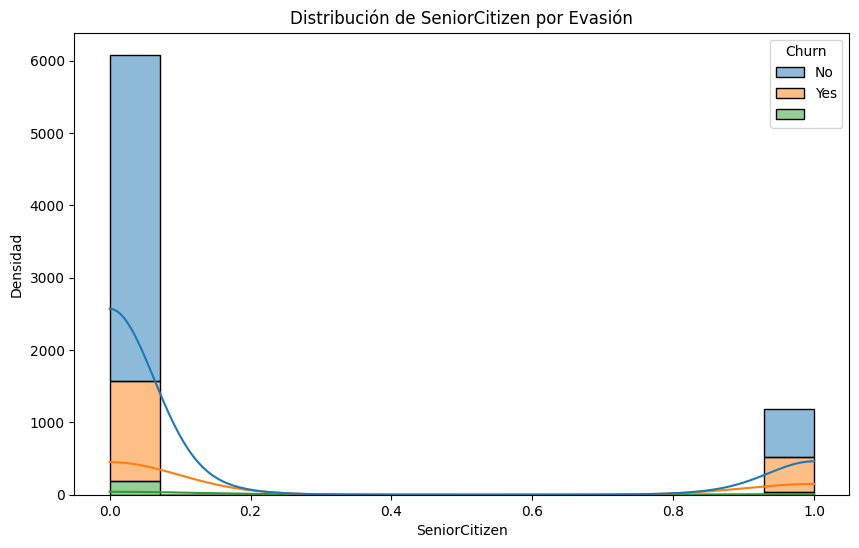

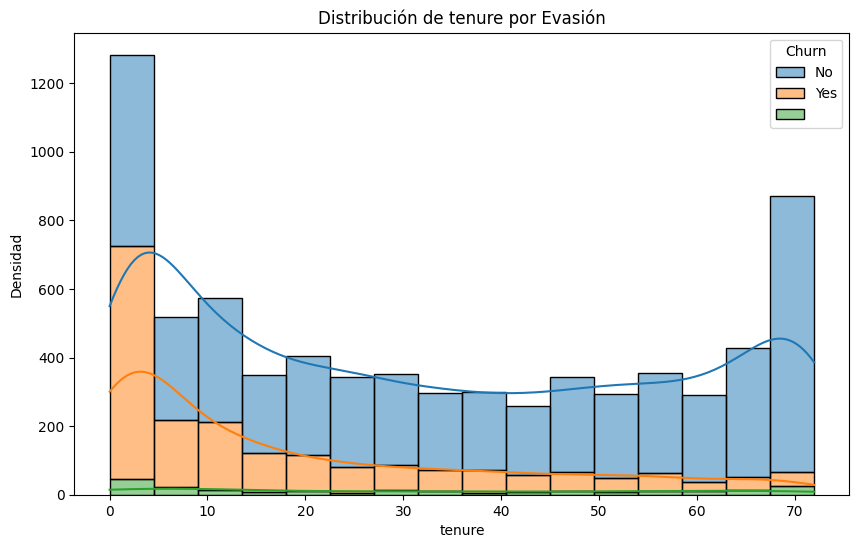

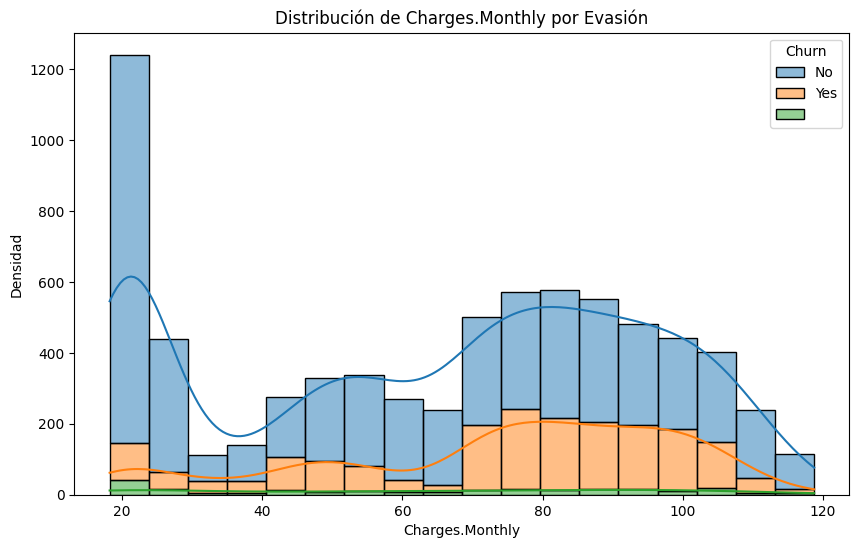

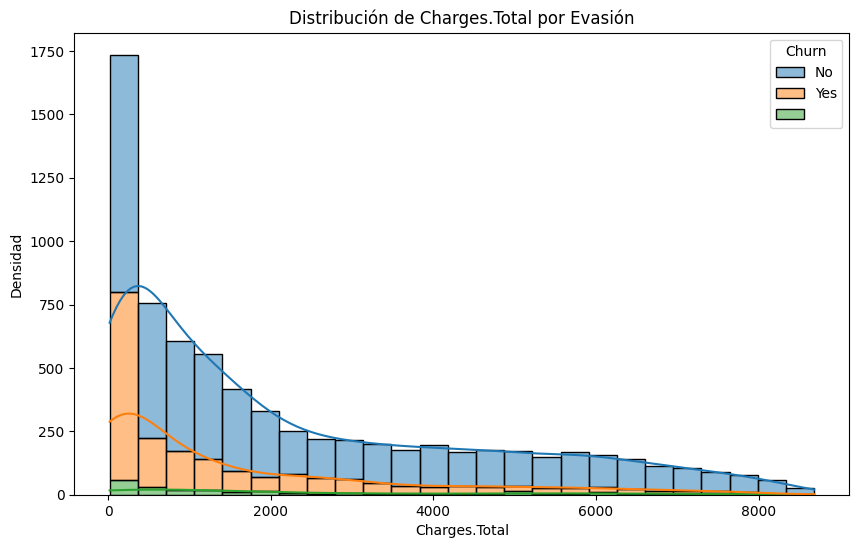

In [57]:
numerical_cols = df_normalizado.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_normalizado, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()

#📄Informe final

# ** Introducción:** Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

Este informe analiza basado en un conjunto de datos de una empresa de TelecomX_LATAM, cuyo objetivo es entender aquellos factores que influyen en la evasión de clientes (Churn). Dado que la evasión de clientes es un problema crítico para las empresas de servicios, ya que adquirir nuevos clientes suele ser más costoso que retener a los existentes. Este análisis busca identificar los perfiles de clientes más propensos a cancelar su servicio, para así poder diseñar estrategias de retención más efectivas.


# **Limpieza y Tratamiento de Datos:** Describe los pasos realizados para importar, limpiar y procesar los datos.

PAra iniciar con el análisis se comenzó con la importación de los datos desde un archivo JSON, desde github. Los datos se encontraban en un formato anidado, por lo que fue necesario realizar un proceso de normalización para convertirlos en una estructura tabular plana y manejable. Los pasos principales fueron:

1. **Importación de Datos:** Se cargaron los datos desde un archivo JSON.
2. **Normalización de Datos:** Las columnas anidadas ('customer', 'phone', 'internet', 'account') se expandieron en columnas individuales.
3. **Conversión de Tipos de Datos:** La columna 'Charges.Total' se convirtió a un tipo de dato numérico para poder realizar cálculos.
4. **Verificación de Nulos y Duplicados:** Se confirmó que no existían valores nulos ni registros duplicados en el conjunto de datos.


# **Análisis Exploratorio de Datos:** Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

El análisis de la variable 'Churn' mostró que una proporción significativa de clientes ha cancelado el servicio, lo que justifica la necesidad de este estudio.

### Evasión por Variables Categóricas
- **Contrato:** Los clientes con contratos de mes a mes (`Month-to-month`) tienen una tasa de evasión considerablemente más alta en comparación con aquellos con contratos de uno o dos años.
- **Servicios de Internet:** Los clientes con servicio de fibra óptica (`Fiber optic`) muestran una mayor propensión a la evasión.
- **Método de Pago:** Los clientes que utilizan el cheque electrónico (`Electronic check`) como método de pago tienen una tasa de evasión más alta.

### Evasión por Variables Numéricas
- **Antigüedad (Tenure):** Los clientes con menor antigüedad (menor `tenure`) son más propensos a cancelar el servicio.
- **Cargos Mensuales (Monthly Charges):** Los clientes con cargos mensuales más altos tienden a una mayor tasa de evasión.


# Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

El análisis de los datos nos permite extraer las siguientes conclusiones:

- **Los clientes nuevos son los más vulnerables:** La mayor tasa de evasión se concentra en los clientes con pocos meses de servicio.
- **La flexibilidad del contrato tiene un costo:** Los contratos de mes a mes, si bien ofrecen flexibilidad, están asociados con una alta tasa de evasión.
- **La tecnología y los pagos influyen:** El servicio de fibra óptica y el pago con cheque electrónico son factores que, por alguna razón, se correlacionan con una mayor tasa de cancelación.

# Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

De los hallazgos, se inditifica los siguiente que permite tomar acciones estratégicas para reducir la evasión de clientes:

1. **Fomentar Contratos a Largo Plazo:** Ofrecer incentivos, descuentos o beneficios adicionales a los clientes que opten por contratos de uno o dos años.
2. **Programas de Lealtad para Clientes Nuevos:** Implementar programas de bienvenida y seguimiento para los clientes durante sus primeros meses, con el fin de mejorar su experiencia y fortalecer la relación con la empresa.
3. **Analizar la Experiencia con Fibra Óptica:** Investigar las posibles causas de la alta evasión en clientes con fibra óptica. Podría estar relacionado con problemas de servicio, expectativas no cumplidas o una competencia más agresiva en este segmento.
4. **Promover Métodos de Pago Alternativos:** Incentivar el uso de métodos de pago con menor tasa de evasión, como el débito automático o la tarjeta de crédito, ofreciendo pequeños descuentos o beneficios.

Este análisis proporciona una base sólida para la toma de decisiones estratégicas orientadas a la retención de clientes. La implementación de estas recomendaciones podría contribuir significativamente a reducir la tasa de evasión y mejorar la rentabilidad de la empresa.
